In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn.decomposition
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
import os

In [2]:
MergedData = pd.read_csv('Data.csv', index_col=0);
Data = MergedData.iloc[:, :-1]
y = MergedData.iloc[:, -1]
display(Data)
display(y)

,ACH-000001_x,ACH-000004_x,ACH-000005_x,ACH-000007_x,ACH-000009_x,ACH-000011_x,ACH-000012_x,ACH-000013_x,ACH-000014_x,ACH-000015_x,...,ACH-001578,ACH-000036,ACH-000973,ACH-001128,ACH-000750,ACH-000285,ACH-002669,ACH-001858,ACH-001997,ACH-000052
A1BG,0.094568,0.012676,0.053957,0.026704,0.059383,0.009210,0.132594,0.062889,0.035633,0.158699,...,2.134221,2.560715,4.986411,4.303781,0.000000,4.868390,0.014355,0.176323,0.000000,4.867402
A1BG,0.094568,0.012676,0.053957,0.026704,0.059383,0.009210,0.132594,0.062889,0.035633,0.158699,...,2.134221,2.560715,4.986411,4.303781,0.000000,4.868390,0.014355,0.176323,0.000000,4.867402
A1CF,0.012519,0.049011,0.027968,0.083588,0.051826,0.026635,0.023306,0.083143,0.066640,0.022402,...,0.000000,0.097611,0.000000,0.000000,0.028569,0.014355,1.035624,0.056584,0.000000,0.000000
A2ML1,0.025962,0.033215,0.005448,0.011299,0.011721,0.003488,0.002901,0.009602,0.015126,0.017902,...,2.805292,0.000000,0.014355,0.000000,0.014355,0.042644,0.000000,0.014355,0.250962,3.187451
A4GNT,0.020199,0.005015,0.005457,0.032573,0.042128,0.031224,0.004329,0.047029,0.351851,0.007575,...,0.000000,0.014355,0.097611,0.000000,0.028569,0.014355,0.028569,0.056584,0.014355,0.189034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZW10,0.555867,0.007427,0.071035,0.213754,0.169463,0.163544,0.128432,0.947852,0.130615,0.174493,...,4.118526,2.247928,5.005400,4.213347,4.361768,4.418190,3.349082,4.179511,3.889474,4.536675
ZWINT,0.080585,0.230569,0.274568,0.615338,0.405712,0.535260,0.966785,0.010011,0.937716,0.120301,...,6.078524,5.747656,7.031991,6.802710,6.051155,7.784504,7.004951,5.780835,5.515069,7.090007
ZWINT,0.080585,0.230569,0.274568,0.615338,0.405712,0.535260,0.966785,0.010011,0.937716,0.120301,...,6.078524,5.747656,7.031991,6.802710,6.051155,7.784504,7.004951,5.780835,5.515069,7.090007
ZZZ3,0.324623,0.042530,0.050412,0.274833,0.269194,0.125139,0.306162,0.580409,0.077300,0.100964,...,4.926948,4.489928,4.135863,3.804260,4.325530,4.258519,3.765535,4.780310,4.276497,4.519793


A1BG     False
A1BG     False
A1CF     False
A2ML1    False
A4GNT    False
         ...  
ZW10     False
ZWINT    False
ZWINT    False
ZZZ3     False
ZZZ3     False
Name: label, Length: 6966, dtype: bool

In [3]:
data_gene_dep = Data.iloc[:, 0:1086]
data_gene_dep;
data_gene_eff = Data.iloc[:, 1087:2172]
data_gene_eff;
data_express = Data.iloc[:, 2173:3578]
data_express;

In [4]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X1 = pca.fit_transform(data_gene_dep)
print(pca.explained_variance_ratio_)

[0.84539087 0.00878596 0.00611456 0.00399093 0.00328664 0.00280009
 0.00266116 0.00216054]


In [5]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X2 = pca.fit_transform(data_gene_eff)
print(pca.explained_variance_ratio_)

[0.88146756 0.0060889  0.00415337 0.00292586 0.00241804 0.00213154
 0.00179926 0.00167852]


In [6]:
pca = sklearn.decomposition.PCA(n_components=8, svd_solver='randomized')
X3 = pca.fit_transform(data_express)
print(pca.explained_variance_ratio_)

[0.8105309  0.02543771 0.01918245 0.01122804 0.0046954  0.00429365
 0.0035973  0.00344976]


In [7]:
X4 = np.concatenate((X1, X2, X3), axis=1)
print(X4.shape)

(6966, 24)


(1346, 24)
(1346,)
659


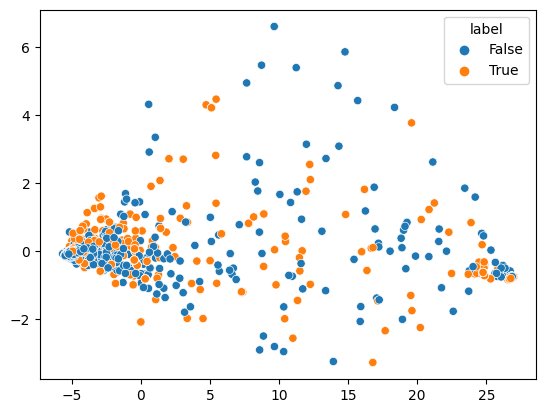

In [8]:
select = np.maximum(y, np.random.rand(len(y)) < sum(y)/(len(y) - sum(y)))
X4 = X4[select]
y = y[select]
print(X4.shape)
print(y.shape)
print(sum(y))
sns.scatterplot(x= X4[:,0], y=X4[:,1], hue=y)
plt.show()

In [9]:
# Get the training and test data
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.3)

# Fit the model
model = LogisticRegression(max_iter=10000).fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_rt = model.predict_proba(X_test)[:, 1]

accuracy = str(accuracy_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rt)
auc_value = str(auc(fpr, tpr))
precision = str(precision_score(y_test, y_pred))
recall = str(recall_score(y_test, y_pred))
f1score = str(f1_score(y_test, y_pred, average="weighted"))

Accuracy:0.5742574257425742
Precision:0.6054421768707483
Recall:0.43842364532019706


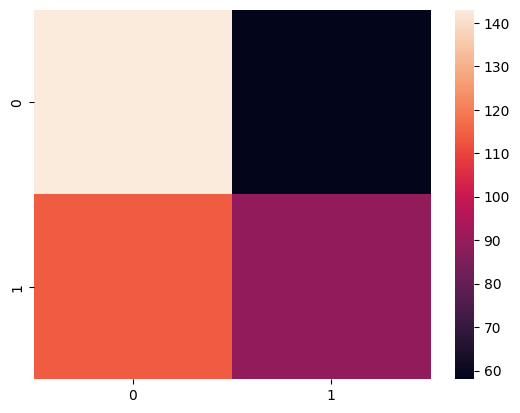

[[143  58]
 [114  89]]


In [10]:
print("Accuracy:" + accuracy)
print("Precision:" + precision)
print("Recall:" + recall)

conf_mx = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mx)
plt.show()

print(conf_mx)

In [11]:
keras.backend.clear_session()
np.random.seed(50)
tf.random.set_seed(50)

In [12]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[24]),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 24)                0         
                                                                 
 dense (Dense)               (None, 150)               3750      
                                                                 
 dense_1 (Dense)             (None, 75)                11325     
                                                                 
 dense_2 (Dense)             (None, 8)                 608       
                                                                 
Total params: 15,683
Trainable params: 15,683
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [16]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_test, y_test),
                    callbacks=[expon_lr])

Epoch 1/5
30/30 [==============================] - 1s 26ms/step - loss: 2.1651 - accuracy: 0.4257 - val_loss: 1.5159 - val_accuracy: 0.4802
Epoch 2/5
30/30 [==============================] - 0s 12ms/step - loss: 1.4843 - accuracy: 0.4958 - val_loss: 1.5744 - val_accuracy: 0.5149
Epoch 3/5
30/30 [==============================] - 0s 7ms/step - loss: 1.4958 - accuracy: 0.5170 - val_loss: 1.0279 - val_accuracy: 0.5520
Epoch 4/5
30/30 [==============================] - 1s 17ms/step - loss: 1.5776 - accuracy: 0.5085 - val_loss: 2.2162 - val_accuracy: 0.5248
Epoch 5/5
30/30 [==============================] - 1s 19ms/step - loss: 1.3566 - accuracy: 0.5552 - val_loss: 1.8544 - val_accuracy: 0.5248


Text(0, 0.5, 'Loss')

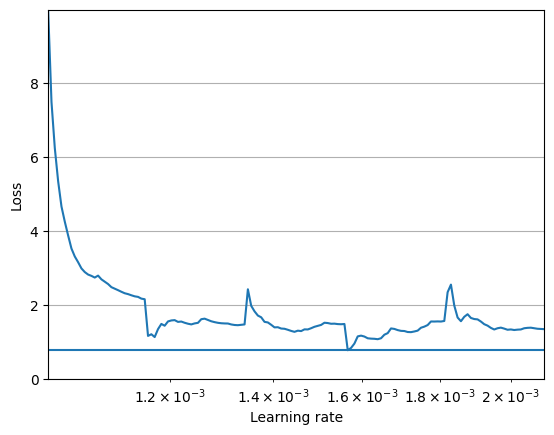

In [17]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [18]:
print("Min Loss: " + str(min(expon_lr.losses)))
print("Best learning rate: " + str(expon_lr.rates[np.argmin(expon_lr.losses)]))
alpha = expon_lr.rates[np.argmin(expon_lr.losses)];

Min Loss: 0.7868173718452454
Best learning rate: 0.0015665542


In [19]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, callbacks
keras.backend.clear_session()
np.random.seed(50)
tf.random.set_seed(50)

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[24]),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dense(8, activation="softmax")
])

In [21]:
#Using optimized learning rate: 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=alpha),
              metrics=["accuracy"])

In [22]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "allcancertypes_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\allcancertypes_logs\\run_001'

In [23]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    min_delta=0.0005, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
)
checkpoint_cb = keras.callbacks.ModelCheckpoint("allcancertypes_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/200
30/30 [==============================] - 1s 28ms/step - loss: 2.0224 - accuracy: 0.4416 - val_loss: 1.4008 - val_accuracy: 0.4604
Epoch 2/200
30/30 [==============================] - 1s 17ms/step - loss: 1.1323 - accuracy: 0.5265 - val_loss: 1.2169 - val_accuracy: 0.5446
Epoch 3/200
30/30 [==============================] - 0s 11ms/step - loss: 0.9993 - accuracy: 0.5722 - val_loss: 0.7978 - val_accuracy: 0.5767
Epoch 4/200
30/30 [==============================] - 0s 12ms/step - loss: 0.9958 - accuracy: 0.5446 - val_loss: 1.3252 - val_accuracy: 0.5743
Epoch 5/200
30/30 [==============================] - 0s 10ms/step - loss: 0.8804 - accuracy: 0.5616 - val_loss: 0.9718 - val_accuracy: 0.6089
Epoch 6/200
30/30 [==============================] - 0s 11ms/step - loss: 0.8142 - accuracy: 0.6157 - val_loss: 1.2503 - val_accuracy: 0.4950
Epoch 7/200
30/30 [==============================] - 0s 12ms/step - loss: 0.7735 - accuracy: 0.6178 - val_loss: 0.8700 - val_accuracy: 0.5941
Epoch 

In [24]:
model = keras.models.load_model("allcancertypes_model.h5") # rollback to best model
model.evaluate(X_test, y_test)
model.evaluate(X_train, y_train)

30/30 [==============================] - 0s 3ms/step - loss: 0.5369 - accuracy: 0.7282


[0.5369105339050293, 0.7282378077507019]

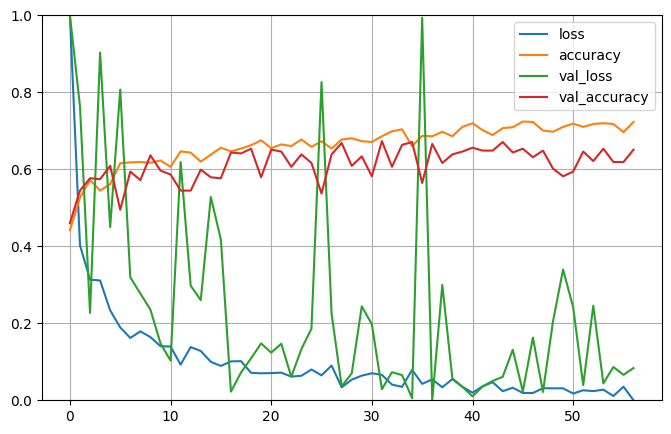

In [25]:
#Plot of Loss, Val_Loss, Accuracy and Val_Accuracy, with loss and val_loss normalized by max and min
hist = pd.DataFrame(history.history)#.plot(figsize=(8, 5))
hist['loss'] = (hist['loss'] - hist['loss'].min()) / (hist['loss'].max() - hist['loss'].min())
hist['val_loss'] = (hist['val_loss'] - hist['val_loss'].min()) / (hist['val_loss'].max() - hist['val_loss'].min())
hist.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
 
plt.show()